In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.constraints import max_norm
from keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import SGD as LegacySGD


In [2]:
np.random.seed(7)

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:

sgd = LegacySGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [10]:
epochs = 5
batch_size = 32
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/5
1563/1563 [==============================] - 20s 7ms/step - loss: 1.7136 - accuracy: 0.3798 - val_loss: 1.3885 - val_accuracy: 0.4976
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3646 - accuracy: 0.5106 - val_loss: 1.2799 - val_accuracy: 0.5334
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2023 - accuracy: 0.5739 - val_loss: 1.1136 - val_accuracy: 0.6052
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0692 - accuracy: 0.6224 - val_loss: 1.0597 - val_accuracy: 0.6222
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9620 - accuracy: 0.6605 - val_loss: 1.0566 - val_accuracy: 0.6344


In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 63.44%


In [12]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers.legacy import SGD as LegacySGD

# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = LegacySGD(lr=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
#sgd = LegacySGD(learning_rate=0.01, momentum=0.9, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8410 - accuracy: 0.3218 - val_loss: 1.5659 - val_accuracy: 0.4246
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4833 - accuracy: 0.4606 - val_loss: 1.3886 - val_accuracy: 0.4975
Epoch 3/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3523 - accuracy: 0.5117 - val_loss: 1.2817 - val_accuracy: 0.5469
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2772 - accuracy: 0.5407 - val_loss: 1.2250 - val_accuracy: 0.5593
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2179 - accuracy: 0.5609 - val_loss: 1.1776 - val_accuracy: 0.5841
Accuracy: 58.41%


In [13]:
import numpy
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])
# Convert the predictions to class labels
predicted_labels = numpy.argmax(predictions, axis=1)
# Convert the actual labels to class labels
actual_labels = numpy.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:   ", actual_labels)

1/1 [==============================] - 0s 344ms/step
Predicted labels: [3 8 8 0]
Actual labels:    [3 8 8 0]


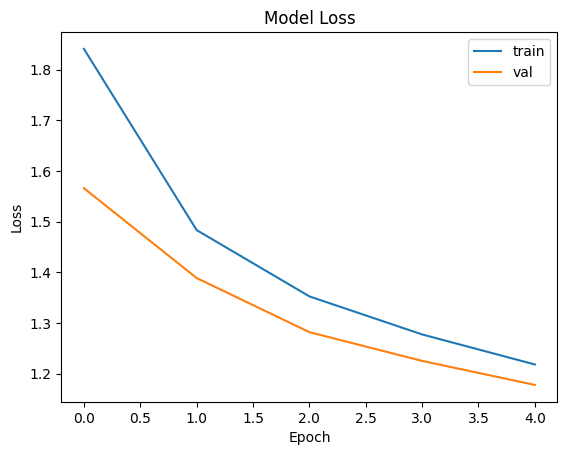

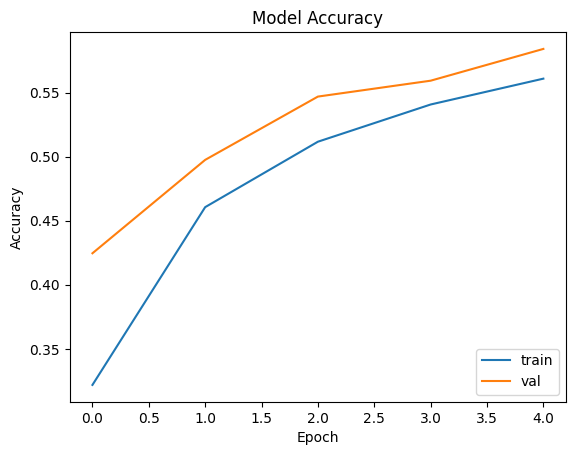

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()